In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import glob
from fastai.vision import *
from fastai.metrics import error_rate
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
images=glob.glob('imagedata/pdf/*/*.png')


In [3]:
lbls=[]
ff=[]
fc=[]
for ele in images:
    posi=ele.rindex("/")
    lbls.append(ele[14:posi])
    posi2=ele[14:posi].index("_page")
    ff.append(ele[14:posi][:posi2])

In [4]:
df = pd.DataFrame(dict(fname=images, label=lbls, fmtitle=ff))

In [5]:
df.head(20)

,fname,label,fmtitle
0,imagedata/pdf/f8654_page_1/f8654_page_1.png,f8654_page_1,f8654
1,imagedata/pdf/f13614nr_page_2/f13614nr_page_2.png,f13614nr_page_2,f13614nr
2,imagedata/pdf/f1098q_page_3/f1098q_page_3.png,f1098q_page_3,f1098q
3,imagedata/pdf/f8891_page_2/f8891_page_2.png,f8891_page_2,f8891
4,imagedata/pdf/f6744_page_5/f6744_page_5.png,f6744_page_5,f6744
5,imagedata/pdf/f656b_page_5/f656b_page_5.png,f656b_page_5,f656b
6,imagedata/pdf/f6744_page_114/f6744_page_114.png,f6744_page_114,f6744
7,imagedata/pdf/f1042sq_page_1/f1042sq_page_1.png,f1042sq_page_1,f1042sq
8,imagedata/pdf/f1098e_19_page_5/f1098e_19_page_...,f1098e_19_page_5,f1098e_19
9,imagedata/pdf/f433dsp_page_2/f433dsp_page_2.png,f433dsp_page_2,f433dsp


In [25]:
def drawData(imgs):
    fig=plt.figure(figsize=(20, 30))
    columns=3
    for i,img in enumerate(imgs):
        _img=mpimg.imread(img)
        plt.subplot(len(imgs)/columns+1,columns,i+1)
        plt.imshow(_img)

In [31]:
df['fname'][10:20]

10        imagedata/pdf/f6744_page_54/f6744_page_54.png
11        imagedata/pdf/f6744_page_81/f6744_page_81.png
12          imagedata/pdf/f8840_page_4/f8840_page_4.png
13        imagedata/pdf/f990sr_page_5/f990sr_page_5.png
14          imagedata/pdf/f1096_page_1/f1096_page_1.png
15      imagedata/pdf/f14581g_page_1/f14581g_page_1.png
16        imagedata/pdf/f8879s_page_1/f8879s_page_1.png
17        imagedata/pdf/f15103_page_1/f15103_page_1.png
18    imagedata/pdf/f1040esn_page_9/f1040esn_page_9.png
19      imagedata/pdf/f8857sp_page_1/f8857sp_page_1.png
Name: fname, dtype: object

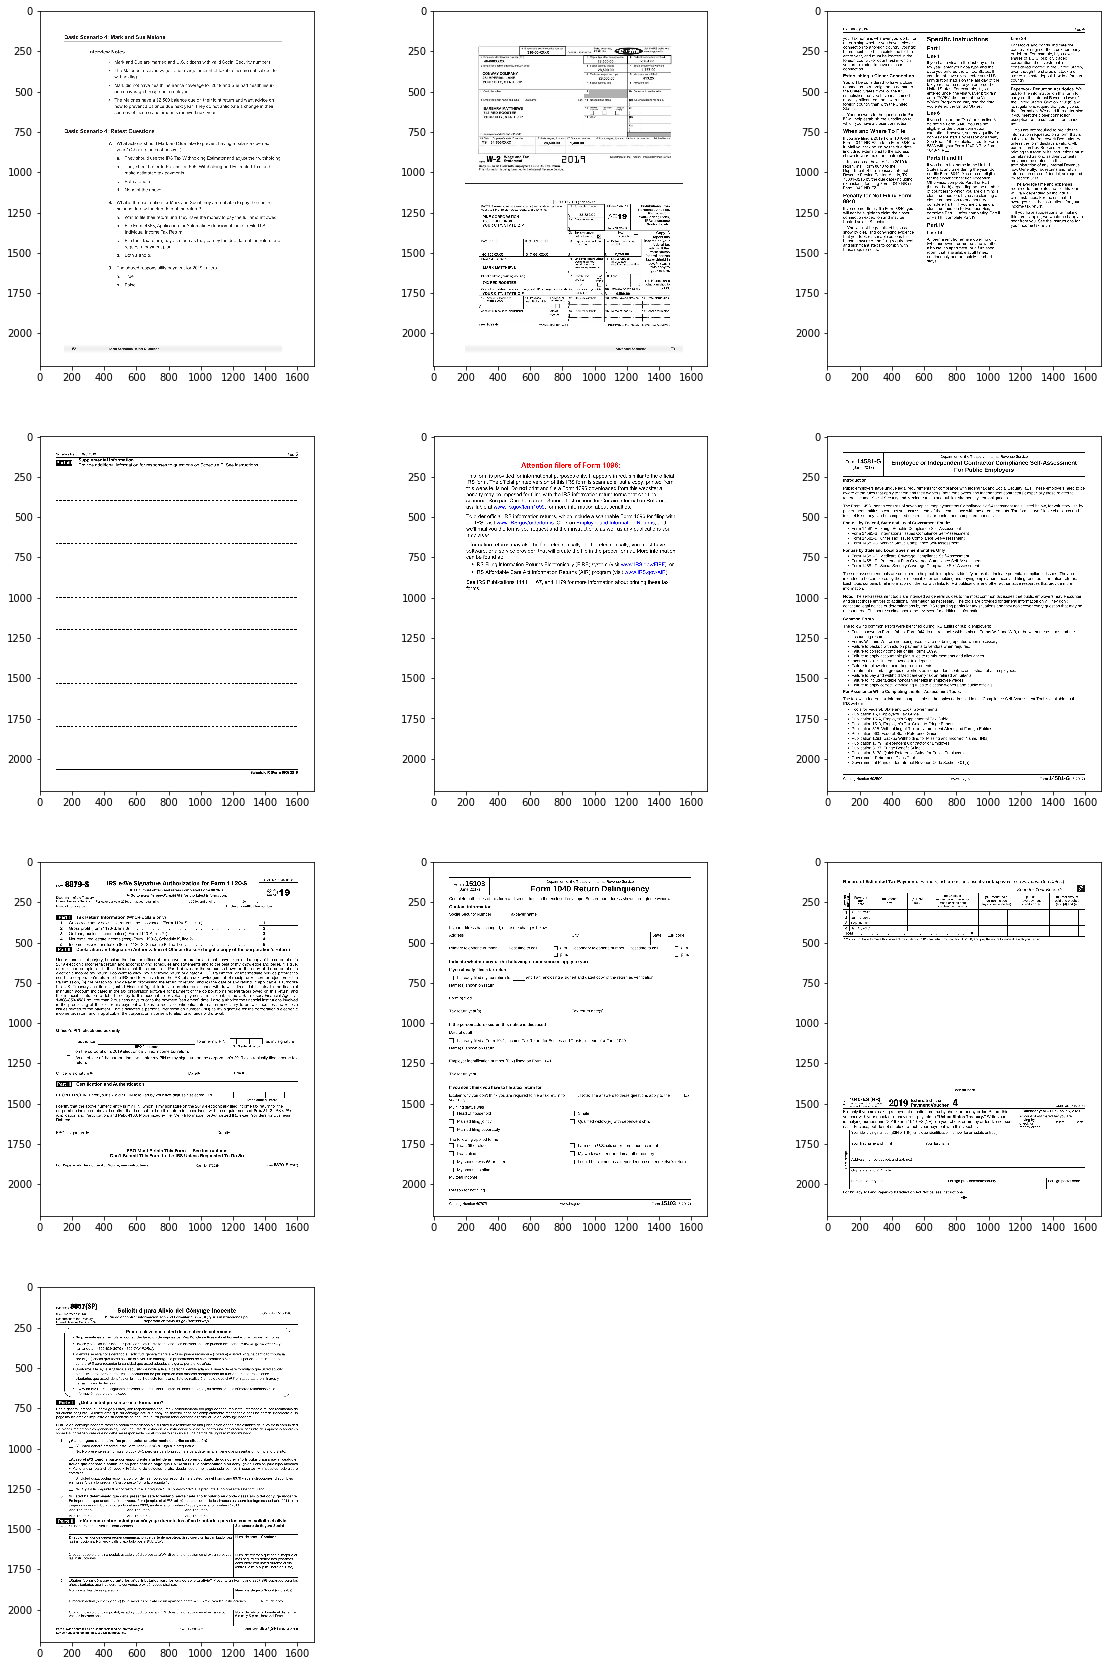

In [26]:
drawData(df['fname'][10:20])

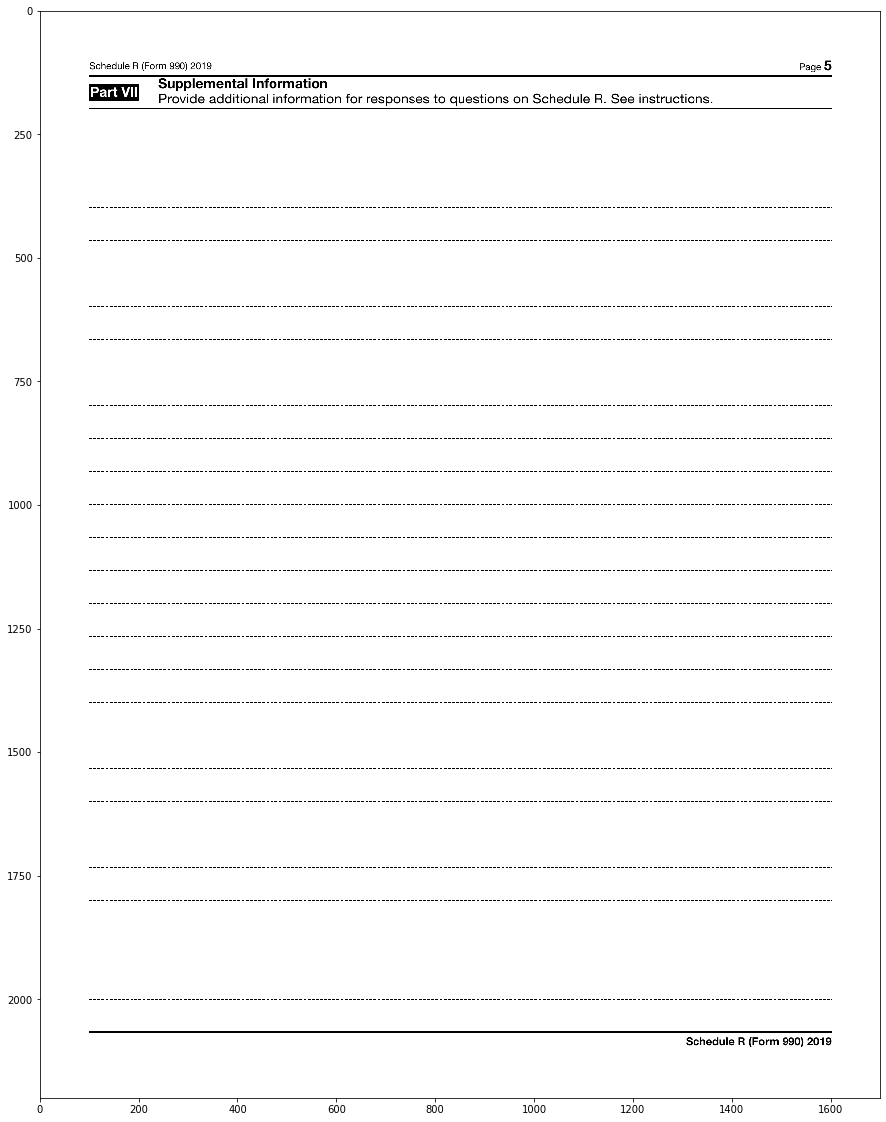

In [38]:
_img=mpimg.imread('imagedata/pdf/f990sr_page_5/f990sr_page_5.png')
fig2 = plt.figure(figsize = (16,20))
plt.imshow(_img)

In [30]:
df['fname'][10:11]

10    imagedata/pdf/f6744_page_54/f6744_page_54.png
Name: fname, dtype: object

In [8]:
img_size = 224
bs = 32
data3 = ImageDataBunch.from_df('.', df, fn_col='fname', label_col='label', \
                              ds_tfms=get_transforms(), size=img_size, bs=bs).normalize(imagenet_stats)

/home/quark/anaconda3/envs/deep/lib/python3.7/site-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
f8849s2_page_2, f990_page_1, f1120f_page_2, f706_page_16, f8908_page_2...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [9]:
learn2 = cnn_learner(data3, models.resnet34, metrics=error_rate)
learn2.model=torch.nn.DataParallel(learn2.model)

In [10]:
learn2.load("mdl_3k_448_084pt")

RuntimeError: Error(s) in loading state_dict for Sequential:
	size mismatch for 1.8.weight: copying a param with shape torch.Size([3451, 512]) from checkpoint, the shape in current model is torch.Size([2761, 512]).
	size mismatch for 1.8.bias: copying a param with shape torch.Size([3451]) from checkpoint, the shape in current model is torch.Size([2761]).